In [1]:
# reload packages
%load_ext autoreload
%autoreload 2

### Choose GPU

In [2]:
%env CUDA_DEVICE_ORDER=PCI_BUS_ID
%env CUDA_VISIBLE_DEVICES=''#0

env: CUDA_DEVICE_ORDER=PCI_BUS_ID
env: CUDA_VISIBLE_DEVICES=''#0


In [3]:
import tensorflow as tf
gpu_devices = tf.config.experimental.list_physical_devices('GPU')
if len(gpu_devices)>0:
    tf.config.experimental.set_memory_growth(gpu_devices[0], True)
print(gpu_devices)
tf.keras.backend.clear_session()

[]


### Load packages

In [4]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tqdm.autonotebook import tqdm
from IPython import display
import pandas as pd
import umap
import copy
import os, tempfile
import tensorflow_addons as tfa
import pickle


/mnt/cube/tsainbur/conda_envs/tpy3/lib/python3.6/site-packages/tqdm/autonotebook/__init__.py:14: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  " (e.g. in jupyter console)", TqdmExperimentalWarning)


In [5]:
dataset = "mnist"
n_latent_dims = 1024
augmented = False

In [6]:
from tfumap.semisupervised_keras import load_architecture, load_pretrained_weights, load_dataset

In [7]:
encoder, classifier, embedder = load_architecture(dataset, n_latent_dims)

In [8]:
from umap import UMAP

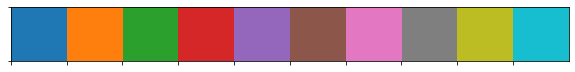

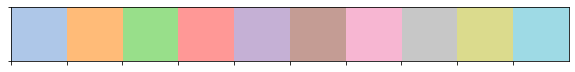

In [9]:
import seaborn as sns
tab20 = sns.color_palette('tab20', 20)
tab20_dark = tab20[::2]
tab20_light = tab20[1::2]
sns.palplot(tab20_dark)
sns.palplot(tab20_light)
from matplotlib.colors import ListedColormap
darkcmap = ListedColormap(sns.color_palette(tab20_dark).as_hex())
lightcmap = ListedColormap(sns.color_palette(tab20_light).as_hex())

In [10]:
from tfumap.paths import ensure_dir, DATA_DIR

W0828 15:34:42.034910 140543921817408 base.py:272] Inconsistent references when loading the checkpoint into this object graph. Either the Trackable object references in the Python program have changed in an incompatible way, or the checkpoint was generated in an incompatible program.

Two checkpoint references resolved to different objects (<tensorflow_addons.layers.wrappers.WeightNormalization object at 0x7fd226d8ad68> and <tensorflow.python.keras.layers.advanced_activations.LeakyReLU object at 0x7fd226d44ac8>).
W0828 15:34:42.037359 140543921817408 base.py:272] Inconsistent references when loading the checkpoint into this object graph. Either the Trackable object references in the Python program have changed in an incompatible way, or the checkpoint was generated in an incompatible program.

Two checkpoint references resolved to different objects (<tensorflow_addons.layers.wrappers.WeightNormalization object at 0x7fd226da2dd8> and <tensorflow.python.keras.layers.advanced_activations.

W0828 15:34:42.111489 140543921817408 base.py:272] Inconsistent references when loading the checkpoint into this object graph. Either the Trackable object references in the Python program have changed in an incompatible way, or the checkpoint was generated in an incompatible program.

Two checkpoint references resolved to different objects (<tensorflow_addons.layers.wrappers.WeightNormalization object at 0x7fd226e58518> and <tensorflow.python.keras.layers.normalization_v2.BatchNormalization object at 0x7fd226e58828>).
W0828 15:34:42.114431 140543921817408 base.py:272] Inconsistent references when loading the checkpoint into this object graph. Either the Trackable object references in the Python program have changed in an incompatible way, or the checkpoint was generated in an incompatible program.

Two checkpoint references resolved to different objects (<tensorflow.python.keras.layers.normalization_v2.BatchNormalization object at 0x7fd226e58828> and <tensorflow.python.keras.layers.adv

1563/1563 [==============================] - 2s 1ms/step
UMAP(dens_frac=0.0, dens_lambda=0.0, verbose=True)
Construct fuzzy simplicial set
Fri Aug 28 15:38:18 2020 Finding Nearest Neighbors
Fri Aug 28 15:38:18 2020 Building RP forest with 16 trees
Fri Aug 28 15:38:20 2020 parallel NN descent for 16 iterations
	 0  /  16
	 1  /  16
	 2  /  16
Fri Aug 28 15:38:32 2020 Finished Nearest Neighbor Search
Fri Aug 28 15:38:35 2020 Construct embedding
	completed  0  /  200 epochs
	completed  20  /  200 epochs
	completed  40  /  200 epochs
	completed  60  /  200 epochs
	completed  80  /  200 epochs
	completed  100  /  200 epochs
	completed  120  /  200 epochs
	completed  140  /  200 epochs
	completed  160  /  200 epochs
	completed  180  /  200 epochs
Fri Aug 28 15:39:27 2020 Finished embedding


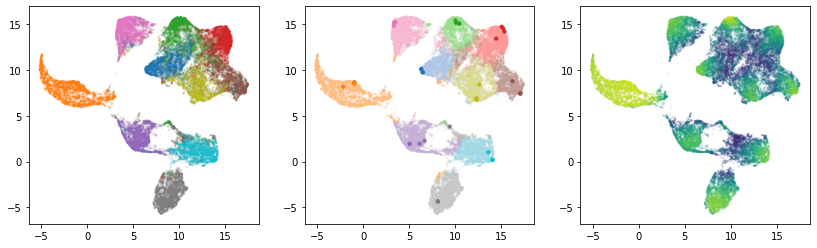

W0828 15:39:32.084320 140543921817408 base.py:272] Inconsistent references when loading the checkpoint into this object graph. Either the Trackable object references in the Python program have changed in an incompatible way, or the checkpoint was generated in an incompatible program.

Two checkpoint references resolved to different objects (<tensorflow_addons.layers.wrappers.WeightNormalization object at 0x7fd226d8ad68> and <tensorflow.python.keras.layers.advanced_activations.LeakyReLU object at 0x7fd226d44ac8>).
W0828 15:39:32.087428 140543921817408 base.py:272] Inconsistent references when loading the checkpoint into this object graph. Either the Trackable object references in the Python program have changed in an incompatible way, or the checkpoint was generated in an incompatible program.

Two checkpoint references resolved to different objects (<tensorflow_addons.layers.wrappers.WeightNormalization object at 0x7fd226da2dd8> and <tensorflow.python.keras.layers.advanced_activations.

W0828 15:39:32.232727 140543921817408 base.py:272] Inconsistent references when loading the checkpoint into this object graph. Either the Trackable object references in the Python program have changed in an incompatible way, or the checkpoint was generated in an incompatible program.

Two checkpoint references resolved to different objects (<tensorflow_addons.layers.wrappers.WeightNormalization object at 0x7fd226e58518> and <tensorflow.python.keras.layers.normalization_v2.BatchNormalization object at 0x7fd226e58828>).
W0828 15:39:32.235302 140543921817408 base.py:272] Inconsistent references when loading the checkpoint into this object graph. Either the Trackable object references in the Python program have changed in an incompatible way, or the checkpoint was generated in an incompatible program.

Two checkpoint references resolved to different objects (<tensorflow.python.keras.layers.normalization_v2.BatchNormalization object at 0x7fd226e58828> and <tensorflow.python.keras.layers.adv

1563/1563 [==============================] - 2s 1ms/step
UMAP(dens_frac=0.0, dens_lambda=0.0, verbose=True)
Construct fuzzy simplicial set
Fri Aug 28 15:43:00 2020 Finding Nearest Neighbors
Fri Aug 28 15:43:00 2020 Building RP forest with 16 trees
Fri Aug 28 15:43:01 2020 parallel NN descent for 16 iterations
	 0  /  16
	 1  /  16
	 2  /  16
Fri Aug 28 15:43:03 2020 Finished Nearest Neighbor Search
Fri Aug 28 15:43:04 2020 Construct embedding
	completed  0  /  200 epochs
	completed  20  /  200 epochs
	completed  40  /  200 epochs
	completed  60  /  200 epochs
	completed  80  /  200 epochs
	completed  100  /  200 epochs
	completed  120  /  200 epochs
	completed  140  /  200 epochs
	completed  160  /  200 epochs
	completed  180  /  200 epochs
Fri Aug 28 15:44:18 2020 Finished embedding


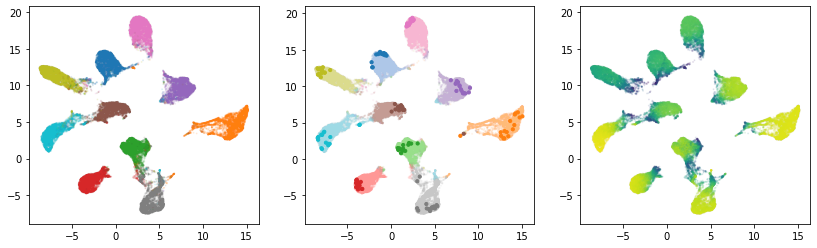

W0828 15:44:23.183893 140543921817408 base.py:272] Inconsistent references when loading the checkpoint into this object graph. Either the Trackable object references in the Python program have changed in an incompatible way, or the checkpoint was generated in an incompatible program.

Two checkpoint references resolved to different objects (<tensorflow_addons.layers.wrappers.WeightNormalization object at 0x7fd226d8ad68> and <tensorflow.python.keras.layers.advanced_activations.LeakyReLU object at 0x7fd226d44ac8>).
W0828 15:44:23.186125 140543921817408 base.py:272] Inconsistent references when loading the checkpoint into this object graph. Either the Trackable object references in the Python program have changed in an incompatible way, or the checkpoint was generated in an incompatible program.

Two checkpoint references resolved to different objects (<tensorflow_addons.layers.wrappers.WeightNormalization object at 0x7fd226da2dd8> and <tensorflow.python.keras.layers.advanced_activations.

W0828 15:44:23.300684 140543921817408 base.py:272] Inconsistent references when loading the checkpoint into this object graph. Either the Trackable object references in the Python program have changed in an incompatible way, or the checkpoint was generated in an incompatible program.

Two checkpoint references resolved to different objects (<tensorflow_addons.layers.wrappers.WeightNormalization object at 0x7fd226e58518> and <tensorflow.python.keras.layers.normalization_v2.BatchNormalization object at 0x7fd226e58828>).
W0828 15:44:23.304098 140543921817408 base.py:272] Inconsistent references when loading the checkpoint into this object graph. Either the Trackable object references in the Python program have changed in an incompatible way, or the checkpoint was generated in an incompatible program.

Two checkpoint references resolved to different objects (<tensorflow.python.keras.layers.normalization_v2.BatchNormalization object at 0x7fd226e58828> and <tensorflow.python.keras.layers.adv

1042/1563 [===================>..........] - ETA: 1:09	completed  60  /  200 epochs
	completed  80  /  200 epochs
	completed  100  /  200 epochs
	completed  120  /  200 epochs
	completed  140  /  200 epochs
	completed  160  /  200 epochs
	completed  180  /  200 epochs
Fri Aug 28 15:49:13 2020 Finished embedding


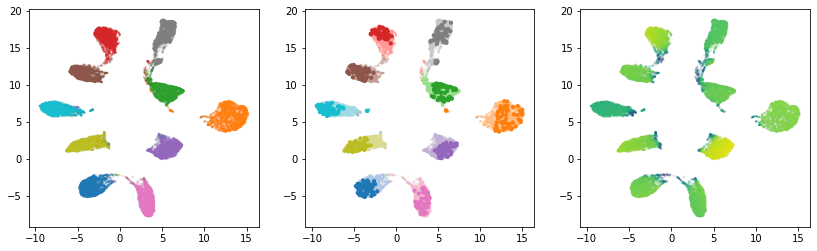

W0828 15:49:18.902594 140543921817408 base.py:272] Inconsistent references when loading the checkpoint into this object graph. Either the Trackable object references in the Python program have changed in an incompatible way, or the checkpoint was generated in an incompatible program.

Two checkpoint references resolved to different objects (<tensorflow_addons.layers.wrappers.WeightNormalization object at 0x7fd226d8ad68> and <tensorflow.python.keras.layers.advanced_activations.LeakyReLU object at 0x7fd226d44ac8>).
W0828 15:49:18.907949 140543921817408 base.py:272] Inconsistent references when loading the checkpoint into this object graph. Either the Trackable object references in the Python program have changed in an incompatible way, or the checkpoint was generated in an incompatible program.

Two checkpoint references resolved to different objects (<tensorflow_addons.layers.wrappers.WeightNormalization object at 0x7fd226da2dd8> and <tensorflow.python.keras.layers.advanced_activations.

W0828 15:49:19.035261 140543921817408 base.py:272] Inconsistent references when loading the checkpoint into this object graph. Either the Trackable object references in the Python program have changed in an incompatible way, or the checkpoint was generated in an incompatible program.

Two checkpoint references resolved to different objects (<tensorflow_addons.layers.wrappers.WeightNormalization object at 0x7fd226e58518> and <tensorflow.python.keras.layers.normalization_v2.BatchNormalization object at 0x7fd226e58828>).
W0828 15:49:19.039806 140543921817408 base.py:272] Inconsistent references when loading the checkpoint into this object graph. Either the Trackable object references in the Python program have changed in an incompatible way, or the checkpoint was generated in an incompatible program.

Two checkpoint references resolved to different objects (<tensorflow.python.keras.layers.normalization_v2.BatchNormalization object at 0x7fd226e58828> and <tensorflow.python.keras.layers.adv

1563/1563 [==============================] - 2s 1ms/step
UMAP(dens_frac=0.0, dens_lambda=0.0, verbose=True)
Construct fuzzy simplicial set
Fri Aug 28 15:52:47 2020 Finding Nearest Neighbors
Fri Aug 28 15:52:47 2020 Building RP forest with 16 trees
Fri Aug 28 15:52:47 2020 parallel NN descent for 16 iterations
	 0  /  16
	 1  /  16
	 2  /  16
Fri Aug 28 15:52:50 2020 Finished Nearest Neighbor Search
Fri Aug 28 15:52:50 2020 Construct embedding
	completed  0  /  200 epochs
	completed  20  /  200 epochs
	completed  40  /  200 epochs
	completed  60  /  200 epochs
	completed  80  /  200 epochs
	completed  100  /  200 epochs
	completed  120  /  200 epochs
	completed  140  /  200 epochs
	completed  160  /  200 epochs
	completed  180  /  200 epochs
Fri Aug 28 15:53:51 2020 Finished embedding


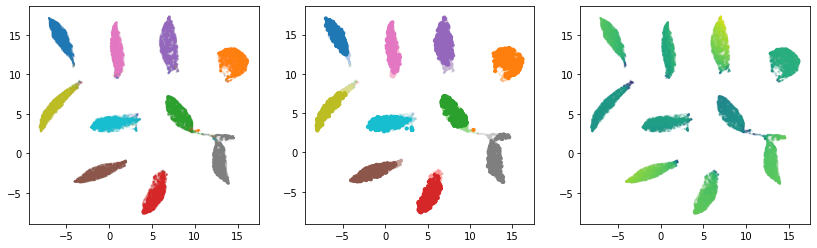

W0828 15:53:56.499623 140543921817408 base.py:272] Inconsistent references when loading the checkpoint into this object graph. Either the Trackable object references in the Python program have changed in an incompatible way, or the checkpoint was generated in an incompatible program.

Two checkpoint references resolved to different objects (<tensorflow_addons.layers.wrappers.WeightNormalization object at 0x7fd226d8ad68> and <tensorflow.python.keras.layers.advanced_activations.LeakyReLU object at 0x7fd226d44ac8>).
W0828 15:53:56.502271 140543921817408 base.py:272] Inconsistent references when loading the checkpoint into this object graph. Either the Trackable object references in the Python program have changed in an incompatible way, or the checkpoint was generated in an incompatible program.

Two checkpoint references resolved to different objects (<tensorflow_addons.layers.wrappers.WeightNormalization object at 0x7fd226da2dd8> and <tensorflow.python.keras.layers.advanced_activations.

W0828 15:53:56.620866 140543921817408 base.py:272] Inconsistent references when loading the checkpoint into this object graph. Either the Trackable object references in the Python program have changed in an incompatible way, or the checkpoint was generated in an incompatible program.

Two checkpoint references resolved to different objects (<tensorflow_addons.layers.wrappers.WeightNormalization object at 0x7fd226e58518> and <tensorflow.python.keras.layers.normalization_v2.BatchNormalization object at 0x7fd226e58828>).
W0828 15:53:56.624981 140543921817408 base.py:272] Inconsistent references when loading the checkpoint into this object graph. Either the Trackable object references in the Python program have changed in an incompatible way, or the checkpoint was generated in an incompatible program.

Two checkpoint references resolved to different objects (<tensorflow.python.keras.layers.normalization_v2.BatchNormalization object at 0x7fd226e58828> and <tensorflow.python.keras.layers.adv

1282/1563 [=======================>......] - ETA: 34s

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



1563/1563 [==============================] - 1s 948us/step
UMAP(dens_frac=0.0, dens_lambda=0.0, verbose=True)
Construct fuzzy simplicial set
Fri Aug 28 15:56:59 2020 Finding Nearest Neighbors
Fri Aug 28 15:56:59 2020 Building RP forest with 16 trees
Fri Aug 28 15:57:00 2020 parallel NN descent for 16 iterations
	 0  /  16
	 1  /  16
	 2  /  16
Fri Aug 28 15:57:02 2020 Finished Nearest Neighbor Search
Fri Aug 28 15:57:02 2020 Construct embedding
	completed  0  /  200 epochs
	completed  20  /  200 epochs
	completed  40  /  200 epochs
	completed  60  /  200 epochs
	completed  80  /  200 epochs
	completed  100  /  200 epochs
	completed  120  /  200 epochs
	completed  140  /  200 epochs
	completed  160  /  200 epochs
	completed  180  /  200 epochs
Fri Aug 28 15:57:57 2020 Finished embedding


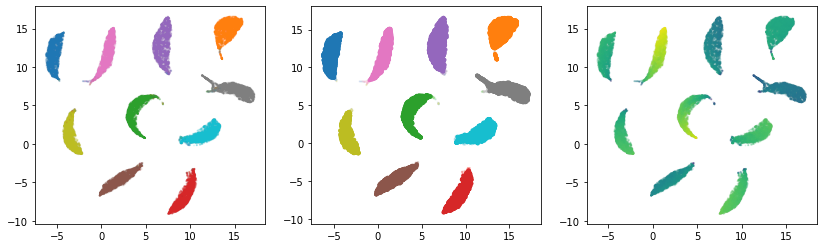

W0828 15:58:02.435572 140543921817408 base.py:272] Inconsistent references when loading the checkpoint into this object graph. Either the Trackable object references in the Python program have changed in an incompatible way, or the checkpoint was generated in an incompatible program.

Two checkpoint references resolved to different objects (<tensorflow_addons.layers.wrappers.WeightNormalization object at 0x7fd226d8ad68> and <tensorflow.python.keras.layers.advanced_activations.LeakyReLU object at 0x7fd226d44ac8>).
W0828 15:58:02.437394 140543921817408 base.py:272] Inconsistent references when loading the checkpoint into this object graph. Either the Trackable object references in the Python program have changed in an incompatible way, or the checkpoint was generated in an incompatible program.

Two checkpoint references resolved to different objects (<tensorflow_addons.layers.wrappers.WeightNormalization object at 0x7fd226da2dd8> and <tensorflow.python.keras.layers.advanced_activations.

W0828 15:58:02.611987 140543921817408 base.py:272] Inconsistent references when loading the checkpoint into this object graph. Either the Trackable object references in the Python program have changed in an incompatible way, or the checkpoint was generated in an incompatible program.

Two checkpoint references resolved to different objects (<tensorflow_addons.layers.wrappers.WeightNormalization object at 0x7fd226e58518> and <tensorflow.python.keras.layers.normalization_v2.BatchNormalization object at 0x7fd226e58828>).
W0828 15:58:02.622074 140543921817408 base.py:272] Inconsistent references when loading the checkpoint into this object graph. Either the Trackable object references in the Python program have changed in an incompatible way, or the checkpoint was generated in an incompatible program.

Two checkpoint references resolved to different objects (<tensorflow.python.keras.layers.normalization_v2.BatchNormalization object at 0x7fd226e58828> and <tensorflow.python.keras.layers.adv

1563/1563 [==============================] - 2s 1ms/step
UMAP(dens_frac=0.0, dens_lambda=0.0, verbose=True)
Construct fuzzy simplicial set
Fri Aug 28 16:00:30 2020 Finding Nearest Neighbors
Fri Aug 28 16:00:30 2020 Building RP forest with 16 trees
Fri Aug 28 16:00:30 2020 parallel NN descent for 16 iterations
	 0  /  16
	 1  /  16
	 2  /  16
Fri Aug 28 16:00:32 2020 Finished Nearest Neighbor Search
Fri Aug 28 16:00:32 2020 Construct embedding
	completed  0  /  200 epochs
	completed  20  /  200 epochs
	completed  40  /  200 epochs
	completed  60  /  200 epochs
	completed  80  /  200 epochs
	completed  100  /  200 epochs
	completed  120  /  200 epochs
	completed  140  /  200 epochs
	completed  160  /  200 epochs
	completed  180  /  200 epochs
Fri Aug 28 16:01:14 2020 Finished embedding


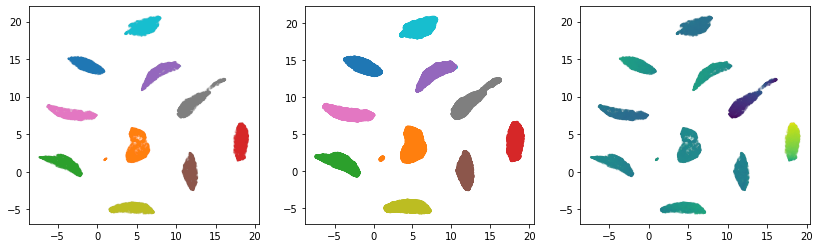

In [11]:
for labels_per_class in tqdm([4, 16, 64, 256, 1024, 'full']):
    encoder, classifier = load_pretrained_weights(dataset, augmented, labels_per_class, encoder, classifier)
    # load data
    (
        X_train,
        X_test,
        X_labeled,
        Y_labeled,
        Y_masked,
        X_valid,
        Y_train,
        Y_test,
        Y_valid,
        Y_valid_one_hot,
        Y_labeled_one_hot,
        num_classes,
        dims
    ) = load_dataset(dataset, labels_per_class)
    
    last_layer_class = tf.keras.models.Model(
        classifier.input, [classifier.get_layer(name=classifier.layers[-2].name).get_output_at(0)],
    )
    z = encoder.predict(X_train, verbose=True)
    # test current acc
    train_predictions = classifier.predict(z, verbose=True)
    train_confidence = np.max(train_predictions, axis=1)
    train_predictions = np.argmax(train_predictions, axis=1)
    
    last_layer_act = last_layer_class.predict(z, verbose=True)
    llz = UMAP(verbose=True).fit_transform(last_layer_act)
    
    fig, axs = plt.subplots(ncols=3, figsize=(14, 4))

    axs[0].scatter(
        llz[:, 0],
        llz[:, 1],
        c=Y_train,
        s=1,
        alpha=0.1,
        cmap=plt.cm.tab10,
    )
    axs[1].scatter(
        llz[:, 0],
        llz[:, 1],
        c=train_predictions,
        s=1,
        alpha=0.1,
        cmap=lightcmap,
    )

    axs[2].scatter(
        llz[:, 0],
        llz[:, 1],
        c=train_confidence,
        s=1,
        alpha=0.1,
        cmap=plt.cm.viridis,
    )

    axs[1].scatter(
        llz[Y_masked != -1, 0],
        llz[Y_masked != -1, 1],
        c=Y_train[Y_masked != -1].flatten(),
        s=10,
        alpha=1,
        cmap=darkcmap,
        rasterized=True,
    )
    plt.show()
    
    ### save data
    # ensure dir
    save_dir = DATA_DIR / 'ssl_embeddings' / dataset / str(labels_per_class)
    ensure_dir(save_dir)
    # save predictions
    np.save(save_dir/'train_predictions.npy', train_predictions)
    # save confidence
    np.save(save_dir/'train_confidence.npy', train_confidence)
    # save last layer z
    np.save(save_dir/'last_layer_embeddings.npy', llz)